In [1]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt

In [6]:
NO_CLIENTS = 56
NO_CLASSES = 100

conf = json.loads(open("data/32_Cifar100_NIID_56c_a01/config.json", "r").read())
data = [dict(zip(np.array(cli)[:,0], np.array(cli)[:,1])) for cli in conf["Size of samples for labels in clients"]]

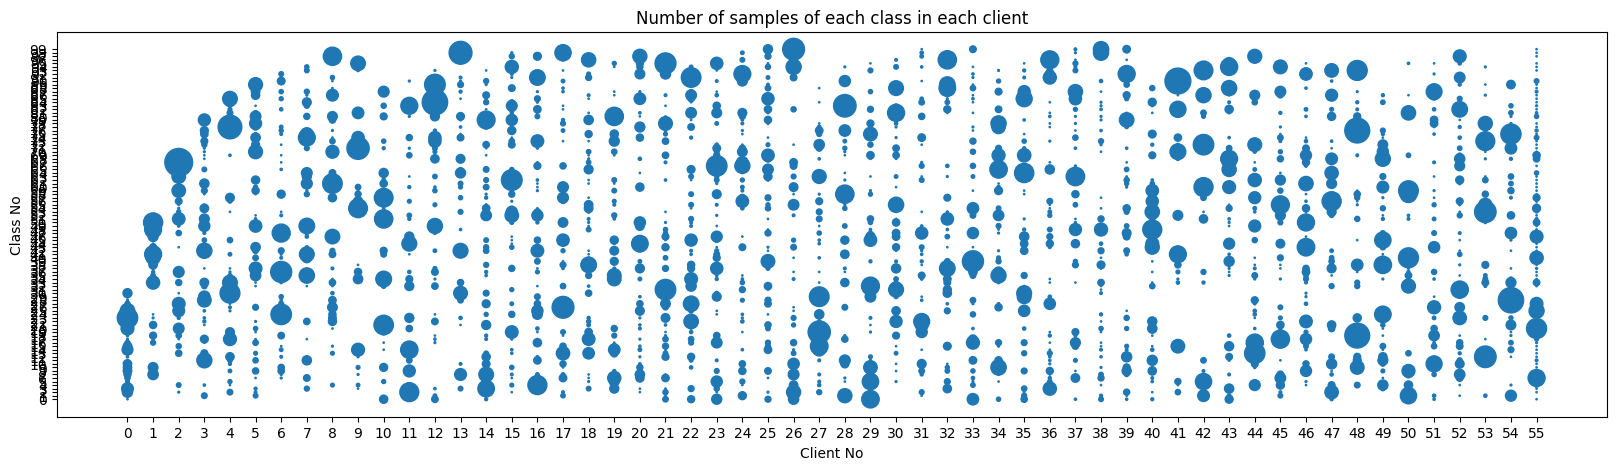

In [7]:
df = pd.DataFrame(data).replace(np.nan, 0)
x = np.array(np.meshgrid(np.arange(NO_CLIENTS),np.arange(NO_CLASSES))).T.reshape(-1,2)[:,0]
y = np.array(np.meshgrid(np.arange(NO_CLIENTS),np.arange(NO_CLASSES))).T.reshape(-1,2)[:,1]
s = df.values.reshape(1,-1)[0].astype("int")
s = (s - np.amin(s))/(np.amax(s) - np.amin(s))*400

fig = plt.figure(figsize=(20,5))
plt.scatter(x,y,s)
plt.xlabel("Client No")
plt.ylabel("Class No")
plt.title("Number of samples of each class in each client")
plt.xticks(np.arange(NO_CLIENTS))
plt.yticks(np.arange(NO_CLASSES))
plt.show()

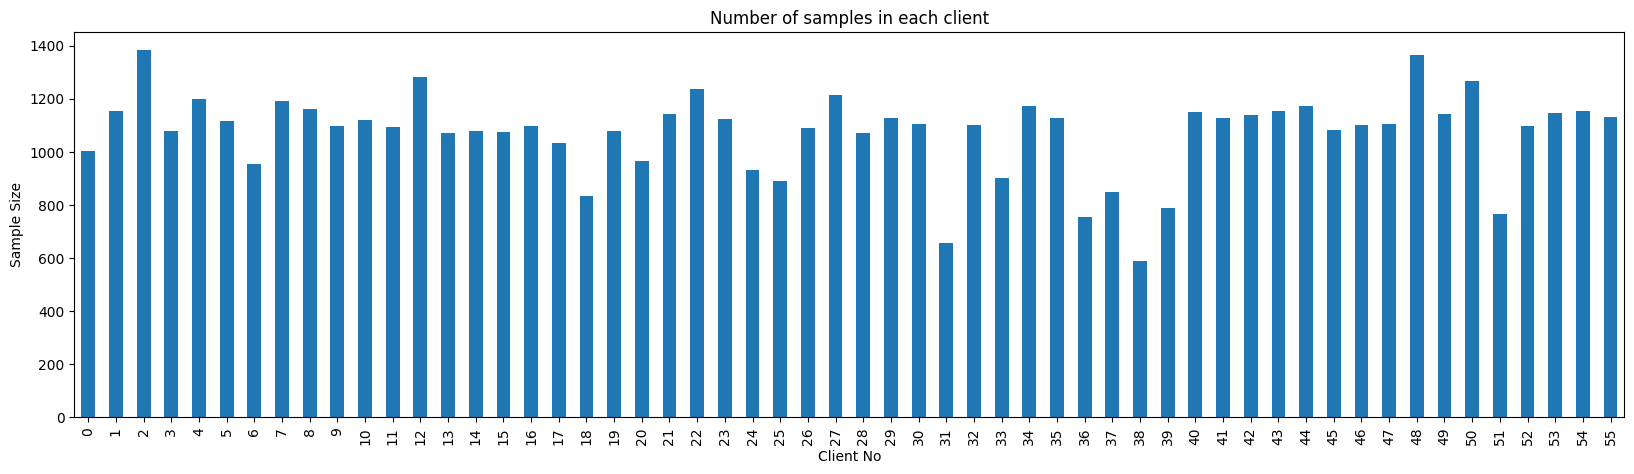

In [8]:
fig = plt.figure(figsize=(20,5))
pd.DataFrame(data).sum(axis=1).plot.bar()
plt.xlabel("Client No")
plt.ylabel("Sample Size")
plt.title("Number of samples in each client")
plt.show()